In [54]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [55]:
train_df = pd.read_csv('Data/data_train_mnist.csv')
test_df = pd.read_csv('Data/data_test_mnist.csv')


In [56]:
train_df.head()

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0.0,15.0,14.0,10.0,30.0,62.0,88.0,109.0,129.0,114.0,...,176.0,179.0,164.0,177.0,184.0,141.0,50.0,8.0,11.0,12.0
1,1.0,121.0,140.0,151.0,170.0,171.0,194.0,196.0,188.0,172.0,...,175.0,175.0,172.0,171.0,157.0,144.0,130.0,98.0,73.0,15.0
2,1.0,23.0,200.0,21.0,22.0,25.0,26.0,25.0,22.0,6.0,...,126.0,114.0,100.0,99.0,101.0,69.0,110.0,33.0,28.0,30.0
3,1.0,101.0,82.0,90.0,100.0,137.0,145.0,178.0,125.0,141.0,...,159.0,128.0,127.0,110.0,119.0,135.0,143.0,159.0,120.0,85.0
4,0.0,70.0,90.0,167.0,179.0,95.0,82.0,33.0,0.0,0.0,...,214.0,211.0,198.0,210.0,203.0,191.0,166.0,56.0,0.0,0.0


In [57]:
train_df = np.array(train_df,dtype='float32')
test_df = np.array(test_df,dtype='float32')
x_train =  train_df[:,1:] /255
y_train =  train_df[:,0]

x_test =  test_df[:,1:] /255
y_test =  test_df[:,0]

In [58]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=12345)

In [59]:
image_sample = x_test[300].reshape(28,28) #reshape into current dimension


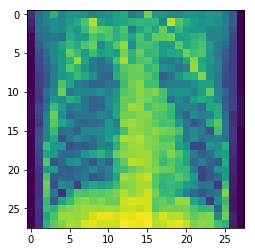

In [60]:
plt.imshow(image_sample)
plt.show()

# Create CNN Model

In [61]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape:{}'.format(x_train.shape))
print('x_test shape:{}'.format(x_test.shape))
print('x_validate shape:{}'.format(x_validate.shape))


x_train shape:(4172, 28, 28, 1)
x_test shape:(624, 28, 28, 1)
x_validate shape:(1044, 28, 28, 1)


In [62]:
name = 'model_1'
cnn_model_1 = Sequential([
    Conv2D(filters=32, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=1, name='MaxPool-1'),
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    MaxPooling2D(pool_size=2, name='MaxPool-2'),
    
    #Dropout(0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(2, activation='softmax', name='Output')
    
],name=name)

name = 'model_2'
cnn_model_2 = Sequential([
    Conv2D(filters=32, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    AveragePooling2D(pool_size=1, name='avgPool-1'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    AveragePooling2D(pool_size=2, name='AvgPool-2'),
    #Dropout(0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(2, activation='softmax', name='Output')
    
],name=name)

"""name = 'model_3'
cnn_model_3 = Sequential([
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=3, name='maxPool-1'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    AveragePooling2D(pool_size=1, name='avgPool-1'),
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-3'),
    MaxPooling2D(pool_size=3, name='maxPool-2'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-4'),
    AveragePooling2D(pool_size=1, name='avgPool-2'),
    #Dropout(0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(64, activation='relu', name='Dense_3'),
    Dense(2, activation='softmax', name='Output')
],name=name)"""

cnn_models = [cnn_model_1, cnn_model_2]
              #cnn_model_3]

In [63]:
im_shape

(28, 28, 1)

In [64]:
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 28, 28, 32)        64        
_________________________________________________________________
MaxPool-1 (MaxPooling2D)     (None, 28, 28, 32)        0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 28, 28, 64)        2112      
_________________________________________________________________
MaxPool-2 (MaxPooling2D)     (None, 14, 14, 64)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
Dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               16512     
__________

In [70]:
history_dict = {}
for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy'])
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=20, verbose=True,
        validation_data=(x_validate, y_validate))
    history_dict[model.name] = history
    


Train on 4172 samples, validate on 1044 samples
Epoch 1/20
4172/4172 [==============================] - 6s 1ms/step - loss: 0.5904 - acc: 0.8078 - val_loss: 0.1211 - val_acc: 0.9569
Epoch 2/20
4172/4172 [==============================] - 5s 1ms/step - loss: 0.2132 - acc: 0.9082 - val_loss: 0.1701 - val_acc: 0.9291
Epoch 3/20
4172/4172 [==============================] - 5s 1ms/step - loss: 0.1668 - acc: 0.9326 - val_loss: 0.1386 - val_acc: 0.9540
Epoch 4/20
4172/4172 [==============================] - 5s 1ms/step - loss: 0.1296 - acc: 0.9564 - val_loss: 0.1279 - val_acc: 0.9607
Epoch 5/20
4172/4172 [==============================] - 5s 1ms/step - loss: 0.1174 - acc: 0.9545 - val_loss: 0.1194 - val_acc: 0.9598
Epoch 6/20
4172/4172 [==============================] - 5s 1ms/step - loss: 0.1090 - acc: 0.9571 - val_loss: 0.1137 - val_acc: 0.9626
Epoch 7/20
4172/4172 [==============================] - 5s 1ms/step - loss: 0.1037 - acc: 0.9593 - val_loss: 0.1125 - val_acc: 0.9636
Epoch 8/20
417

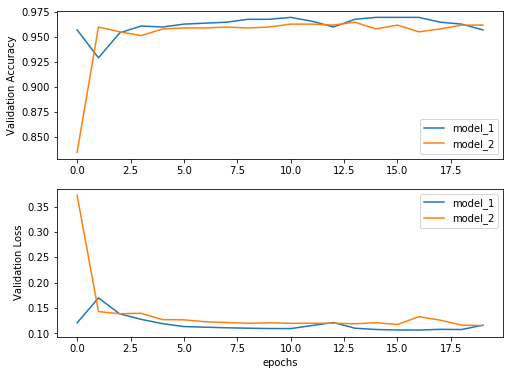

In [71]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [72]:
score = cnn_model_1.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


624/624 [==============================] - 0s 359us/step
Test Loss : 0.7369
Test Acc  : 0.7756


In [73]:
score = cnn_model_2.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


624/624 [==============================] - 0s 571us/step
Test Loss : 0.7859
Test Acc  : 0.7676


In [74]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
# This is used for plotting the images.
img_shape = (img_size, img_size)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, 1)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 2

labels = ['Normal\n', 'Pneumonia\n']


In [75]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 16
    
    # Create figure with 4x4 sub-plots.
    fig, axes = plt.subplots(4, 4)
    fig.subplots_adjust(hspace=1.0, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

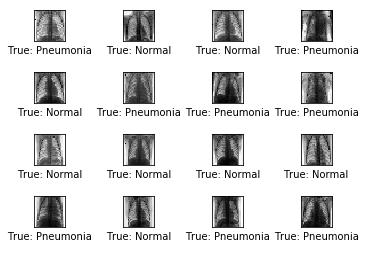

In [76]:
# Get the first images from the test-set.
random_data = np.random.randint(623, size= 16)
images = x_test[random_data]
cls_true = y_test[random_data]
cls_true = cls_true.astype(int)
cls_lbl = []
for i in range(len(cls_true)):
    cls_lbl = np.append(cls_lbl, labels[cls_true[i]])
    
# Get the true classes for those images.
cls_true = y_test[random_data]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_lbl)

In [49]:
print(random_data)

[298 399 140 437  36 248 333 475 121 107 161 117 111 143 237  71]


#  Model 1 

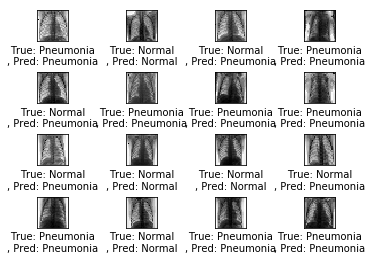

In [77]:

#Predict
#images = x_test[500:516]

images = x_test[random_data]

y_pred = cnn_model_1.predict(x=images) #swicth to model that we use 
cls_pred = np.argmax(y_pred,axis=1)
cls_lbl_pred = []
for i in range(len(y_pred)):
    cls_lbl_pred = np.append(cls_lbl_pred, labels[cls_pred[i]])
    

plot_images(images=images,
            cls_true=cls_lbl,
            cls_pred=cls_lbl_pred)



# Model 2

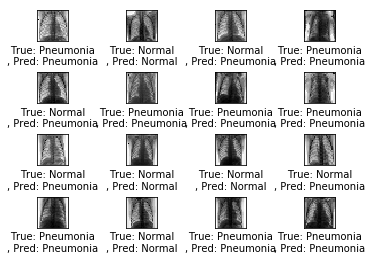

In [78]:
#Predict
#images = x_test[500:516]

images = x_test[random_data]

y_pred = cnn_model_2.predict(x=images) #swicth to model that we use 
cls_pred = np.argmax(y_pred,axis=1)
cls_lbl_pred = []
for i in range(len(y_pred)):
    cls_lbl_pred = np.append(cls_lbl_pred, labels[cls_pred[i]])
    

plot_images(images=images,
            cls_true=cls_lbl,
            cls_pred=cls_lbl_pred)